# 국가별 음주 데이터 분석

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
drinks = pd.read_csv("./data/drinks.csv")

## 데이터 파악

In [5]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [6]:
drinks.shape

(193, 6)

In [7]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [8]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [9]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


- 피처
    - country : 국가 정보
    - beer_servings : beer 소비량
    - spirit_servings : spirit 소비량
    - wine_servings : wine 소비량 
    - total_litres_of_pure_alcohol : 총 알코올 소비량
    - continent : 국가의 대륙 정보

## 데이터 속성 탐색

- 상관 분석
    - 두 변수 간의 선형적 관계를 상관 계수(숫자)로 표현하는 것
    - 상관 계수는 공분산의 개념을 포함함
        -공분산 
            - 2개의 확률변수에 대한 상관 정도
            - 2개의 변수 중 하나의 값이 상승하는 경향이 보일 때, 다른 값도 상승하는 경향을 수치로 나타낸 것
            - 공분산 만으로 상관 관계를 구한다면 두 변수의 단위 크기에 영향을 받음
                - 큰 단위의 데이터라면 공분산이 커짐
    - 따라서 상관 계수는 공분산을 -1과 1사이의 값으로 변환한 것
    - |상관계수| > 0.7이상 나와야 좋은 것

- 상관 관계를 통계적으로 탐색하는 방법
    - 단순 상관 분석 : 피처가 2개일 떄의 상관 계수를 계산
    - 다중 상관 분석 : 대상 피처가 여러 개일 떄 상호 가늬 연관성 분석

### beer_servings, wine_servings의 상관 계수 구하기

In [13]:
drinks[["beer_servings", "wine_servings"]].corr()

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


=> 자기 자신과는 무조건 1

### 다중 상관 분석

In [16]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [17]:
cor_cols = drinks.columns[1:5]
cor_cols

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')

In [18]:
drinks_corr = drinks[cor_cols].corr()
drinks_corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


#### heatmap 시각화

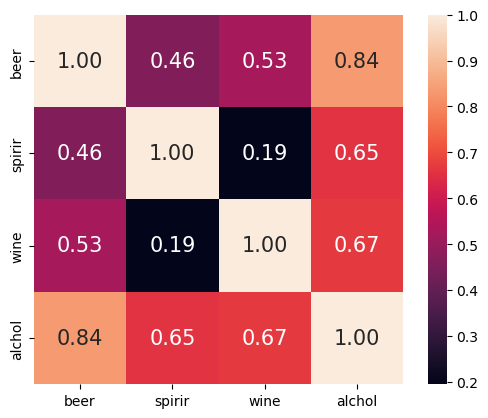

In [20]:
# 그래프 출력을 위해 컬럼명 축약
cols_label = ["beer", "spirir", "wine", "alchol"]

sns.heatmap(drinks_corr.values, cbar = True, annot = True, square = True, fmt =".2f", 
            annot_kws ={"size" : 15}, yticklabels = cols_label, xticklabels = cols_label)

plt.show()

#### 산점도 관계 그래프

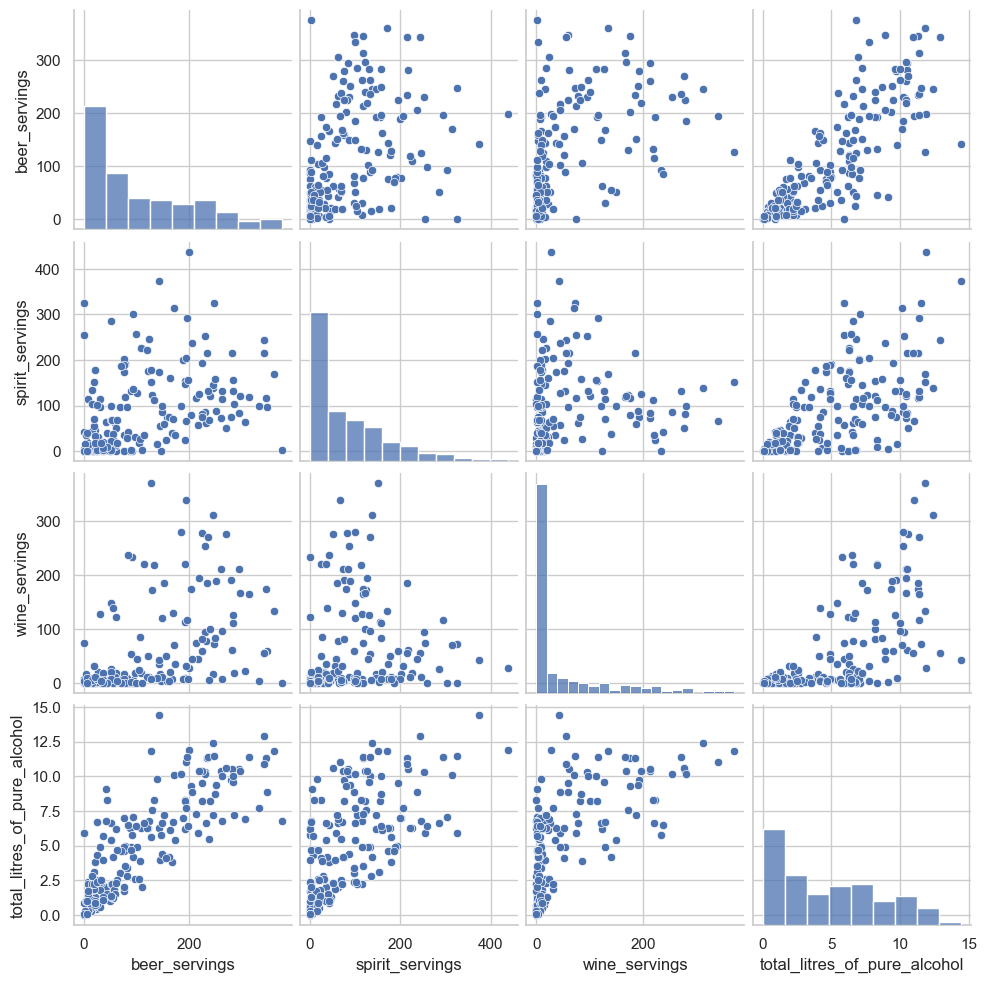

In [22]:
sns.set(style = "whitegrid")
sns.pairplot(drinks[cor_cols], height = 2.5)
plt.show()

- total_liters_of_pure_alchole 피처가 대체적으로 다른 모든 피처와 강한 상관관계가 있는 것으로 보임

- 특히 beer_servings와의 상관성이 높음

## 데이터 전처리

### continet 결측치 대체

In [26]:
# 각 칼럼의 결측치 세기
drinks.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [27]:
drinks["continent"].unique()

array(['AS', 'EU', 'AF', nan, 'SA', 'OC'], dtype=object)

=> "NA"가 nan으로 인식된거 아닐까 추측....

In [29]:
drinks[drinks["continent"].isna()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,NaN
11,Bahamas,122,176,51,6.3,NaN
14,Barbados,143,173,36,6.3,NaN
17,Belize,263,114,8,6.8,NaN
32,Canada,240,122,100,8.2,NaN
41,Costa Rica,149,87,11,4.4,NaN
43,Cuba,93,137,5,4.2,NaN
50,Dominica,52,286,26,6.6,NaN
51,Dominican Republic,193,147,9,6.2,NaN
54,El Salvador,52,69,2,2.2,NaN


In [30]:
drinks["continent"] = drinks["continent"].fillna("NA")

In [31]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [32]:
drinks["continent"].value_counts()

continent
AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: count, dtype: int64

## 데이터 탐색

### 각 대륙별 비율 확인

In [35]:
continents = drinks["continent"].value_counts()

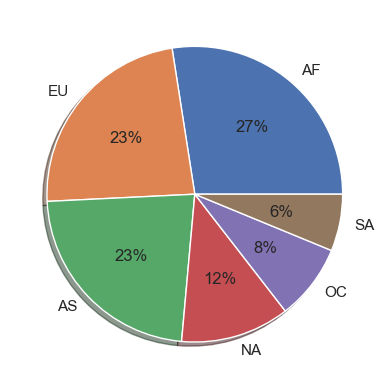

In [36]:
plt.pie(continents.values, labels = continents.index, autopct = "%.0f%%", shadow = True)
plt.show()

### 대륙별 spirir_servings의 통계 정보 확인

- agg 함수
    - 그룹에 대한 여러 가지 연산 결과를 동시에 얻을 수 있는 함수

In [38]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계 확인
stat = drinks.groupby("continent")["spirit_servings"].agg(["mean", "min", "max", "sum"])
stat

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
NA,165.739130,68,438,3812
OC,58.437500,0,254,935
SA,114.750000,25,302,1377


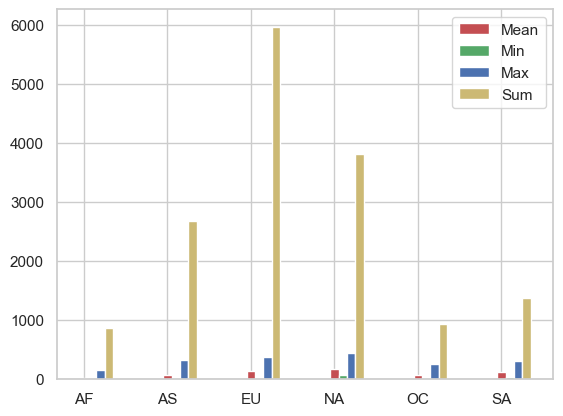

In [39]:
n_groups = len(stat)
idx = np.arange(n_groups)

rects1 = plt.bar(idx, stat["mean"], width = 0.1, color = "r", label= "Mean")
rects2 = plt.bar(idx+0.1, stat["min"], width = 0.1, color = "g", label= "Min")
rects3 = plt.bar(idx+0.2, stat["max"], width = 0.1, color = "b", label= "Max")
rects4 = plt.bar(idx+0.3, stat["sum"], width = 0.1, color = "y", label= "Sum")

plt.xticks(idx, stat.index)
plt.legend()
plt.show()

### 전체 평균보다 더 많은 알코올을 섭취하는 대륙

In [41]:
alc_mean = drinks["total_litres_of_pure_alcohol"].mean()
alc_mean

4.717098445595855

In [42]:
con_mean = drinks.groupby("continent")["total_litres_of_pure_alcohol"].mean()
con_mean

continent
AF    3.007547
AS    2.170455
EU    8.617778
NA    5.995652
OC    3.381250
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [43]:
con_mean[con_mean >=alc_mean]

continent
EU    8.617778
NA    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [44]:
# 전체 평균도 시각화해주기 위해서 대륙 리스트에 mean 추가
continents = con_mean.index.tolist()
continents.append("mean")

x_pos = np.arange(len(continents))

alc = con_mean.tolist()
alc.append(alc_mean)

In [45]:
continents

['AF', 'AS', 'EU', 'NA', 'OC', 'SA', 'mean']

In [46]:
alc

[3.0075471698113208,
 2.1704545454545454,
 8.617777777777778,
 5.995652173913044,
 3.38125,
 6.308333333333334,
 4.717098445595855]

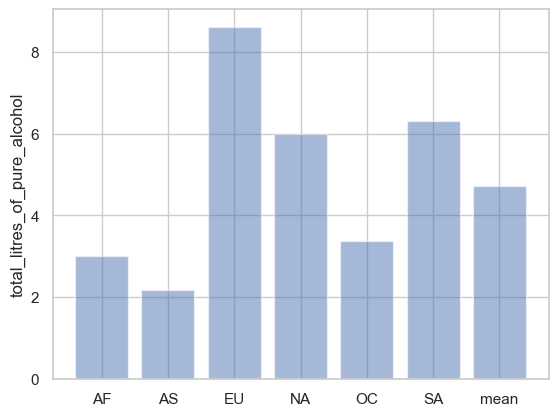

In [47]:
bar_list = plt.bar(x_pos, alc, alpha = 0.5)

plt.xticks(x_pos, continents)
plt.ylabel("total_litres_of_pure_alcohol")
plt.show()

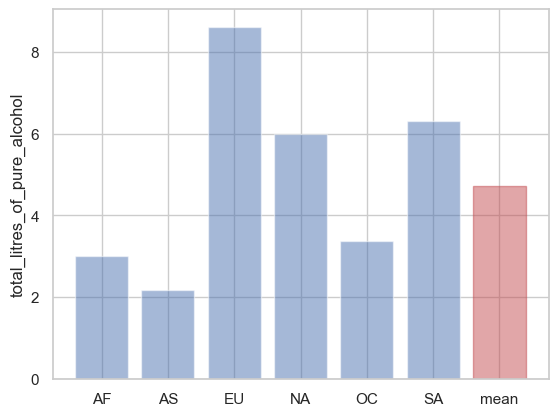

In [48]:
bar_list = plt.bar(x_pos, alc, alpha = 0.5)

# 마지막 바만 빨간색으로 변경
bar_list[-1].set_color("r")

plt.xticks(x_pos, continents)
plt.ylabel("total_litres_of_pure_alcohol")
plt.show()

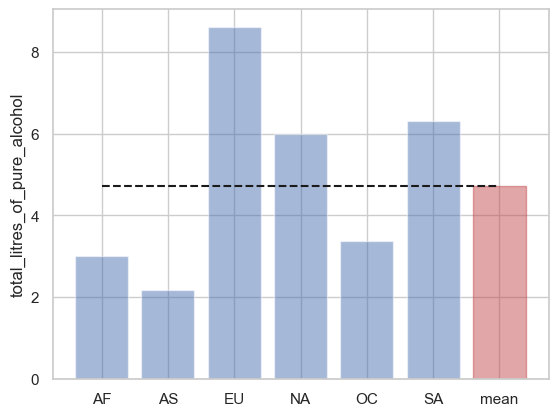

In [49]:
bar_list = plt.bar(x_pos, alc, alpha = 0.5)

# 마지막 바만 빨간색으로 변경
bar_list[-1].set_color("r")

# 평균선 그리기
plt.plot([0, len(continents)-1], [alc_mean, alc_mean], "k--", )

plt.xticks(x_pos, continents)
plt.ylabel("total_litres_of_pure_alcohol")
plt.show()

### 평균 beer_servings가 가장 높은 대륙

- idxmax함수
    - 시리즈 객체에서 값이 가장 큰 index를 반환

In [51]:
drinks.groupby("continent")["beer_servings"].mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
NA    145.434783
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

In [52]:
drinks.groupby("continent")["beer_servings"].mean().idxmax()

'EU'

In [53]:
group_beer = drinks.groupby("continent")["beer_servings"].sum()

In [54]:
group_beer

continent
AF    3258
AS    1630
EU    8720
NA    3345
OC    1435
SA    2101
Name: beer_servings, dtype: int64

In [55]:
continents = group_beer.index.tolist()

In [56]:
continents

['AF', 'AS', 'EU', 'NA', 'OC', 'SA']

In [57]:
continents.index("EU")

2

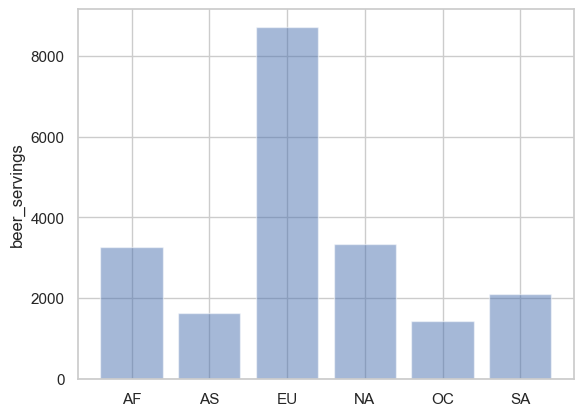

In [58]:
x_pos = np.arange(len(group_beer))

ber_list = plt.bar(x_pos, group_beer, alpha = 0.5)

plt.xticks(x_pos, continents)
plt.ylabel("beer_servings")

plt.show()

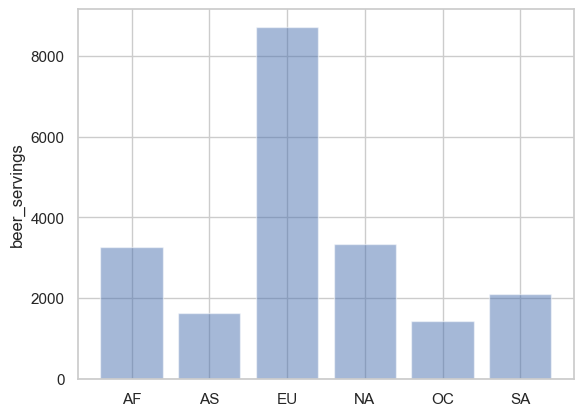

In [59]:
x_pos = np.arange(len(group_beer))

ber_list = plt.bar(x_pos, group_beer, alpha = 0.5)
bar_list[continents.index("EU")].set_color("r")

plt.xticks(x_pos, continents)
plt.ylabel("beer_servings")

plt.show()

### 대륙별 평균 wine_servings구하기

In [105]:
drinks.groupby("continent")["wine_servings"].mean()

continent
AF     16.264151
AS      9.068182
EU    142.222222
NA     24.521739
OC     35.625000
SA     62.416667
Name: wine_servings, dtype: float64

### total_litres_of_pure_alcohol이 전체 평균보다 낮은 나라 중 spirit을 가장 많이 마시는 국가 찾기

In [108]:
alc_mean

4.717098445595855

In [110]:
drinks[drinks["total_litres_of_pure_alcohol"] <=alc_mean]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
2,Algeria,25,0,14,0.7,AF
7,Armenia,21,179,11,3.8,EU
10,Azerbaijan,21,46,5,1.3,EU
12,Bahrain,42,63,7,2.0,AS
...,...,...,...,...,...,...
187,Vanuatu,21,18,11,0.9,OC
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [112]:
drinks[drinks["total_litres_of_pure_alcohol"] <=alc_mean].sort_values("spirit_servings", ascending = False)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
134,Philippines,71,186,1,4.6,AS
7,Armenia,21,179,11,3.8,EU
21,Bosnia-Herzegovina,76,173,8,4.6,EU
96,Liberia,19,152,2,3.1,AF
43,Cuba,93,137,5,4.2,NA
...,...,...,...,...,...,...
107,Mauritania,0,0,0,0.0,AF
111,Monaco,0,0,0,0.0,EU
118,Nauru,49,0,8,1.0,OC
128,Pakistan,0,0,0,0.0,AS


## 옳은 데이터분석
1. 논문의 뒷받침
2. 공신력있는 내용(기사, 뉴스...)
3. 학문적으로 이론이 뒷받침되는 내용

## 통계 분석

- 지금까지의 분석은 통찰을 발견하는 데 있어서는 유용했지만, 분석가의 주관에 따라 분석된 내용이기 때문에 타당성을 입증하기 어려움

- 타당성을 위해서는 통계적으로 검증하는 과정이 필요

- t 검정
    - 두 집단 간 평균의 차이에 대한 검정
    - 모집단의 평균을 모를 때 현재의 데이터만으로 두 집단의 차이에 대해 검정할 수 있음
    - 단, 두 집단의 데이터 개수가 비슷하고, 정규 분포인 경우에 신뢰도가 높음

1. 정규분포
2. 등분산성
3. t-test

### 아프리카와 유럽 간의 맥주 소비량 차이 검정

In [120]:
from scipy import stats

In [122]:
af = drinks[drinks["continent"] =="AF"]
eu = drinks[drinks["continent"] =="EU"]

In [125]:
# 등분산성 검정
result = stats.levene(af["beer_servings"], eu["beer_servings"])

In [129]:
result
# pvalue>=0 => 등분산성 만족, <0..5 => 등분산성 비만족

LeveneResult(statistic=6.015144059118397, pvalue=0.015989187968374834)

In [135]:
# 두 집단의 분산이 같지 않은 경우
t_result =stats.ttest_ind(af["beer_servings"], eu["beer_servings"], equal_var=False)

# 두 집단의 분산이 같은 경우
t_result_equalvar =stats.ttest_ind(af["beer_servings"], eu["beer_servings"], equal_var=True)

In [137]:
print(t_result)
print(t_result_equalvar)

TtestResult(statistic=-7.143520192189803, pvalue=2.9837787864303205e-10, df=84.40013075489844)
TtestResult(statistic=-7.267986335644365, pvalue=9.719556422442453e-11, df=96.0)


- t-statisticks(t-test의 검정 통계량)
    - 그 자체로는 아무 의미 없으며 p-value와 함께 해석함
    - 귀무가설과의 차이를 뜻함

- p-value(유의확률)
    - 가설이 얼마나 믿을만한 것인지를 나타내는 지표
    - 데이터를 새로 샘플링 했을 때 귀무 가설이 맞다는 전제 하에 나온 통계값 이상이 나올 확률
        - 즉, p-value가 낮으면 귀무 가설이 일어날 확률이 너무 낮기 때문에 귀무 가설을 기각하게 됨
            - 보통 그 기준은 0.05나 0.01을 기준으로 함

- 귀무가설
    - 처음부터 버릴 것을 예상하는 가설
    - 가설이 맞지 않다는 것을 증명하기 위해 수립하는 가설
    - 반대되는 가설을 대립 가설이라고 부르며, 귀무 가설이 거짓인 경우에 대안으로 참이 되는 가설임

#### 분석 내용

- t-test의 귀무 가설 : "두 집단의 평균이 같다"

- p-value가 0.05이하로 나타나 귀무 가설이 기각되었음

- 따라서 "이프리카와 유럽 대륙 간의 맥주 소비량 차이"는 통계적으로 유의미
    - 두 집단의 평균은 다름